# Exploratory Data Analysis (EDA)

<a id="top"></a>

#### This is a notebook that follows immediately after [Preprocessing.ipynb](Preprocessing.ipynb).
Included here are the code for some of the tables and graphs used in my full presentation.<br>

* [EDA on page_info](#page-info-eda)
* [EDA on top_1000_pages](#top-1000-page-eda)
* top_1000_pages_cleaned


## Merging Tables


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
%matplotlib inline

In [2]:
import os
import re
import spacy
from spacy import displacy
import pickle
os.chdir('/home3/r09725056/Desktop/analysis-ChingYaoL')
print(os.getcwd())
# Use relative paths in the code

/home3/r09725056/Desktop/analysis-ChingYaoL


In [3]:
for file in os.listdir():
    print(file, end=' ')

input code output temp .git README.md README_about_USFB_Data.pdf 

#### Suggested workflow from README
* Use relative paths in the code
* Read data from _input_
* Export generated tables or figures to _output_
* Read/Write other temporary files from _temp_

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 讓 DataFrame Output可以重複疊起來
pd.set_option('display.max_columns', None) # show all columns
pd.set_option('display.max_rows', 150) # show 150 columns

In [5]:
from datetime import datetime
from pandas_profiling import ProfileReport

In [6]:
import nltk
import string
import fasttext
import contractions # resolving contractions and slangs, e.g. "yall're happy now" --> "you all are happy now"
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords');

In [7]:
import demoji
# demoji.download_codes()

In [8]:
# Page
page_info = pd.read_csv(r'input/page/1000-page-info.csv')
politician_info = pd.read_csv(r'input/page/politician-info.csv')
page_politician_info = pd.read_csv(r'input/page/1000-page-and-politician-info.csv')

# Post
# top_1000_pages = pd.read_csv(r'input/post/1000-page/2015-01-01-to-2017-04-08.csv', parse_dates=['post_created_time_CT', 'post_updated_time_CT'])
# politician_pages = pd.read_csv(r'input/post/politician/2015-01-01-to-2016-11-30.csv')

<a id="page-info-eda"></a>

## EDA on page_info
[[Back to Top]](#top)
### type

In [17]:
pd.DataFrame(page_info['type'].value_counts(dropna=False))

,type
media,587
group,231
figure,138
others,44


### type_sub

In [19]:
pd.DataFrame(page_info['type_sub'].value_counts(dropna=False))

,type_sub
website,303
NaN,275
tv,188
journalist,97
magazine,42
newspaper,42
politician,41
radio,12


### type, type_sub

In [15]:
summary = pd.DataFrame(page_info.groupby(['type'], dropna=False)['type_sub'].value_counts(dropna=False)).rename(columns={'type_sub': 'count'})
summary['percentage'] = summary['count'].apply(lambda x: x / summary.sum())
summary['percentage'] = summary['percentage'].apply(lambda x: "{:.3f}%".format(100 * x))

In [16]:
summary

count
type   type_sub         
figure journalist     97
       politician     41
group  NaN           231
media  website       303
       tv            188
       magazine       42
       newspaper      42
       radio          12
others NaN            44

### type, type_sub, type_issue

In [9]:
summary = pd.DataFrame(page_info.groupby(['type', 'type_sub'], dropna=False)['type_issue'].value_counts(dropna=False)).rename(columns={'type_issue': 'count'})
summary['percentage'] = summary['count'].apply(lambda x: x / summary.sum())
summary['percentage'] = summary['percentage'].apply(lambda x: "{:.3f}%".format(100 * x))

In [10]:
summary

count percentage
type   type_sub   type_issue                   
figure journalist NaN             97     9.700%
       politician NaN             41     4.100%
group  NaN        NaN            203    20.300%
                  gun             12     1.200%
                  abortion         4     0.400%
                  healthcare       3     0.300%
                  inequality       3     0.300%
                  LGBT             2     0.200%
                  jew              2     0.200%
                  environment      1     0.100%
                  immigration      1     0.100%
media  magazine   NaN             40     4.000%
                  LGBT             1     0.100%
                  hispanic         1     0.100%
       newspaper  NaN             41     4.100%
                  hispanic         1     0.100%
       radio      NaN             10     1.000%
                  black            1     0.100%
                  hispanics        1     0.100%
       tv         NaN            182    18.200%
                  hispanic         4     0.400%
                  muslim           1     0.100%
                  muslims          1     0.100%
       website    NaN            294    29.400%
                  hispanic         4     0.400%
                  LGBT             3     0.300%
                  gun              1     0.100%
                  jews             1     0.100%
others NaN        NaN             44     4.400%

### type, type_sub, type_issue, category

In [11]:
summary = pd.DataFrame(page_info.groupby(['type', 'type_sub', 'type_issue'], dropna=False)['category'].value_counts(dropna=False)).rename(columns={'category': 'count'})
summary['percentage'] = summary['count'].apply(lambda x: x / summary.sum())
summary['percentage'] = summary['percentage'].apply(lambda x: "{:.3f}%".format(100 * x))

In [12]:
summary

count  \
type   type_sub   type_issue  category                                     
figure journalist NaN         Public Figure                           52   
                              News Personality                        12   
                              Journalist                              10   
                              Author                                   6   
                              Comedian                                 4   
                              Entertainer                              4   
                              News/Media Website                       4   
                              Actor/Director                           1   
                              Blogger                                  1   
                              Community                                1   
                              Media/News/Publishing                    1   
                              Writer                                   1   
       politician NaN         Public Figure                           18   
                              Politician                              16   
                              Community                                2   
                              Business Person                          1   
                              Government Official                      1   
                              News/Media Website                       1   
                              Non-Profit Organization                  1   
                              Political Organization                   1   
group  NaN        LGBT        Political Organization                   2   
                  abortion    Non-Profit Organization                  4   
                  environment Non-Profit Organization                  1   
                  gun         Non-Profit Organization                  4   
                              Community                                2   
                              Arts/Humanities Website                  1   
                              Cause                                    1   
                              Education Website                        1   
                              Journalist                               1   
                              Society/Culture Website                  1   
                              Website                                  1   
                  healthcare  Community                                1   
                              Non-Profit Organization                  1   
                              Political Organization                   1   
                  immigration Non-Profit Organization                  1   
                  inequality  Community                                1   
                              Organization                             1   
                              Society/Culture Website                  1   
                  jew         Non-Profit Organization                  2   
                  NaN         Community                               70   
                              Political Organization                  34   
                              Non-Profit Organization                 30   
                              Political Party                         11   
                              Organization                             9   
                              Public Figure                            6   
                              Media/News/Publishing                    5   
                              Society/Culture Website                  5   
                              Community Organization                   4   
                              Website                                  4   
                              Cause                                    3   
                              Comedian                                 3   
                              Education

In [27]:
page_info['category'].nunique()

51

### The number of each reactions

In [29]:
with open(r'temp/temp_variables/num_reactions.pkl', 'rb') as f:
    num_reactions = pickle.load(f)

In [45]:
{key: value/sum(num_reactions.values()) for key, value in num_reactions.items()}

{'LIKE': 0.7839491512243403,
 'LOVE': 0.06180752506189409,
 'HAHA': 0.05878366187943282,
 'WOW': 0.02250544658683427,
 'SAD': 0.02685692862157418,
 'ANGRY': 0.04609726068094062,
 'THANKFUL': 2.594498371052917e-08}

### The number of likes

In [84]:
like = pd.read_pickle(r'temp/reaction/1000-page/20-min/LIKE_50.pkl')

In [47]:
idx = pd.IndexSlice
like.iloc[like.index.get_locs((slice(None), '2016-09-29 15:00:00'))]

post_id                        reaction_time      
10018702564_10155047714987565  2016-09-29 15:00:00     2
10018702564_10155047773282565  2016-09-29 15:00:00     1
10018702564_10155047828857565  2016-09-29 15:00:00    14
10018702564_10155047851217565  2016-09-29 15:00:00     7
10018702564_10155047873362565  2016-09-29 15:00:00     3
                                                      ..
99881661864_10154169851856865  2016-09-29 15:00:00    18
99881661864_10154169902186865  2016-09-29 15:00:00    12
99881661864_10154169905541865  2016-09-29 15:00:00     2
99881661864_10154169982501865  2016-09-29 15:00:00     1
99881661864_10154170024116865  2016-09-29 15:00:00     6
Name: reaction_time, Length: 33844, dtype: int64

In [114]:
pd.DataFrame(like)

n_likes
post_id                       reaction_time               
10018702564_10155047714987565 2016-09-29 15:00:00        2
10018702564_10155047773282565 2016-09-29 15:00:00        1
10018702564_10155047828857565 2016-09-29 15:00:00       14
10018702564_10155047851217565 2016-09-29 15:00:00        7
10018702564_10155047873362565 2016-09-29 15:00:00        3
...                                                    ...
99881661864_10154330704701865 2016-11-21 03:40:00        2
                              2016-11-21 12:00:00        1
99881661864_10154331725691865 2016-11-21 14:20:00        1
99881661864_10154331732161865 2016-11-21 14:20:00        1
                              2016-11-21 14:40:00        1

[4793496 rows x 1 columns]

In [113]:
like.resample('H', level='reaction_time').sum()

reaction_time
2016-09-29 15:00:00    354902
2016-09-29 16:00:00      5872
2016-09-29 17:00:00      5931
2016-09-29 18:00:00      6233
2016-09-29 19:00:00      6163
                        ...  
2016-11-21 11:00:00      3240
2016-11-21 12:00:00      4313
2016-11-21 13:00:00      5439
2016-11-21 14:00:00      5824
2016-11-21 15:00:00      2157
Freq: H, Name: n_likes, Length: 1273, dtype: int64

### Example for the presentation: 9GAG

In [11]:
page_info[page_info['page_name'] == '9GAG']

,page_id,page_name,category,type,type_sub,type_issue,fan_count,talking_about_count,page_url,total_like,total_comment,total_share,1:07:14,rank_1:7:14
759,21785951839,9GAG,App Page,others,NaN,NaN,32155423,11547502,https://www.facebook.com/9gag,13909,725,1555,4075.4,760


<a id="post-data"></a>

# Post
Data stored in the variable: top_1000_pages

[[Back to Top]](#top)

* #### [EDA on Post Data](#post-data-eda)
* #### [Preprocessing Post Data](#preprocessing-post-data)

### Techniques Adopted for Cleaning Post Texts

##### Basic Preprocessing
0. Drop unwanted columns ('post_created_date_CT', 'post_updated_date_CT', 'post_created_time', 'post_updated_time')
1. Drop completely duplicate rows
2. Expand contractions and slangs (eg. yall're cool -> you all are cool): [GitHub for contractions](https://github.com/kootenpv/contractions)
3. Add language labels (using Language Detection Model from fasttext)
 * the reason I use fasttext: [Benchmarking Language Detection for NLP](https://towardsdatascience.com/benchmarking-language-detection-for-nlp-8250ea8b67c)
 * [PyPI for fasttext](https://pypi.org/project/fasttext/)
 * [medium on fasttext](https://medium.com/@c.chaitanya/language-identification-in-python-using-fasttext-60359dc30ed0)
4. Summarize the number of English, non-English, and empty comments, and store the summary in a global counter, `en_counter_post`
5. Filter out non-English or empty comments; then, drop the language column
6. Convert all words to lowercase
7. Remove html `<br>` tags, punctuations, links, newlines, tabs, and shrink consecutive spaces to one
8. Remove emojis
9. Remove stopwords (using nltk)
10. Lemmatize texts (using spacy)
11. Pickle (Serialize) the result

<a id="post-data-eda"></a>

## EDA on Post Data

In [7]:
def func_to_string(func):
    """
    A decorator that allows a function to bypass nonstring arguments. That is, func applies only to nonstrings.
    """
    def wrapper_func(x):
        try:
            return func(x)
        except:
            return x
    return wrapper_func

# Functions to apply to textual column
@func_to_string
def contract_message(x):
    return contractions.fix(x)

pretrained_model = "/home3/r09725056/.conda/envs/usfb/lib/python3.7/site-packages/fasttext/lid.176.bin"
model = fasttext.load_model(pretrained_model)    
@func_to_string
def predict_language(sent):
    sent = sent.replace('\n', ' ')
    pred = model.predict(sent) # model.predict() returns a tuple like this: (('__label__en',), array([0.95346403]))
    return pred[0][0].split('_')[-1]

@func_to_string
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

@func_to_string
def remove_emoji_updated(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
@func_to_string
def lemmatize(text):
    doc = nlp(text)
    return " ".join(token.lemma_ for token in doc)

@func_to_string
def remove_punc_symbol(text):
    "Remove html <br> tags, punctuations, links, newlines, tabs, and shrink spaces"
    pattern = re.compile(r'(<br>|\W|https?://[a-zA-Z0-9-./]+)', re.IGNORECASE)
    text = re.sub(pattern, ' ', text)
    text = re.sub(r'[ ]+', ' ', text) # replace multiple spaces with one space
    return text

In [12]:
top_1000_pages['post_message'] = top_1000_pages['post_message'].apply(contract_message)

In [13]:
print(top_1000_pages['post_message'].isna().sum())
print(top_1000_pages['post_message'].notna().sum())
print(f"null rate: {top_1000_pages['post_message'].isna().sum() / top_1000_pages['post_message'].notna().sum():.6f} %")

1410491
13337455
null rate: 0.105754 %


### English Lanuage Detection
The reason I use fasttext: [Benchmarking Language Detection for NLP](https://towardsdatascience.com/benchmarking-language-detection-for-nlp-8250ea8b67c)

In [15]:
top_1000_pages['language'] = top_1000_pages['post_message'].apply(predict_language)

In [16]:
top_1000_pages['language'].value_counts(dropna=False, normalize=True).round(6)

en     0.864186
NaN    0.095640
es     0.026220
ja     0.003480
ru     0.001332
         ...   
yo     0.000000
sd     0.000000
bcl    0.000000
lo     0.000000
scn    0.000000
Name: language, Length: 148, dtype: float64

In [17]:
def filter_top_unique_elements(ser, thres=0.001, ndecimal=6, show_null_rate=True):
    """
    Return top unique elements which take up no less than 0.001 (or thres) in the entire pd.Series
    This is done through ser.value_counts(normalize=True, dropna=False)
    """
    filt = (ser.value_counts(dropna=False, normalize=True) >= thres)
    if show_null_rate:
        print(f"null rate = {ser.isnull().mean() * 100:.6f} %")
    return ser.value_counts(dropna=False).loc[filt].round(ndecimal)

# filter for languages that's at least 0.1%, then assign to top_languages
lang_thres = 0.001
top_languages = filter_top_unique_elements(top_1000_pages['language'], lang_thres)uppercaseuppercase

null rate = 9.563983 %


In [18]:
# A simpler way to format yticks
# fig, ax = plt.subplots(figsize=(12, 8))
# f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
# g = lambda x, pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
# plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))
# top_languages.plot.bar()

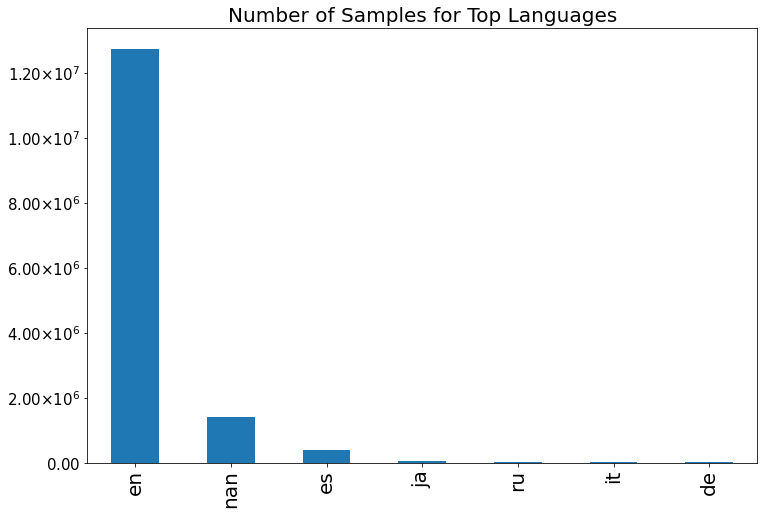

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
# Customize Yticks
class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)

# Format with 2 decimal places
plt.gca().yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))
# Plot Top Languages
plt.title("Number of Samples for Top Languages", size=20)
plt.xticks(size=20)
plt.yticks(size=15)
top_languages.plot.bar();

In [20]:
# filter for languages that's at least 0.01%
filter_top_unique_elements(top_1000_pages['post_name'], thres=0.0001)

null rate = 5.482309 %


Timeline Photos                                                             1398811
NaN                                                                          808528
Mobile Uploads                                                                23079
Nation In Distress                                                            10221
Occupy Democrats                                                               8409
                                                                             ...   
The Free Thought Project.com                                                   1530
GOPocalypse                                                                    1527
Fox Business                                                                   1505
Conservatives Are Destroying Our Future                                        1501
Here’s the Video That Will Finally DERAIL Hillary! Must See Documentary!       1475
Name: post_name, Length: 73, dtype: int64

In [21]:
top_1000_pages['language'].value_counts(normalize=True, dropna=False).apply(lambda x: f"{x * 100:.6f}%")

en     86.418610%
NaN     9.563983%
es      2.622019%
ja      0.347974%
ru      0.133219%
          ...    
yo      0.000007%
sd      0.000007%
bcl     0.000007%
lo      0.000007%
scn     0.000007%
Name: language, Length: 148, dtype: object

In [22]:
top_1000_pages['post_type'].value_counts(dropna=False)

link         11235316
photo         2099309
video         1225049
status         182016
event            5692
note              420
music             102
offer              41
post_type           1
Name: post_type, dtype: int64

In [23]:
top_1000_pages.head()

,page_id,page_name,post_id,post_type,post_name,post_message,post_caption,post_picture,post_link,post_description,post_reactions,post_likes,post_comments,post_shares,post_created_time_CT,post_updated_time_CT,post_created_date_CT,post_updated_date_CT,post_created_time,post_updated_time,page_talking_about_count,language
0,5.444446e+10,WTHR-TV,54444461143_10153245342666144,photo,NaN,WTHR is wishing a very happy birthday to John ...,NaN,https://scontent.xx.fbcdn.net/hphotos-xpf1/v/t...,https://www.facebook.com/WTHR13/photos/a.12486...,NaN,NaN,3920739.0,97206.0,1521964.0,2015-07-25 20:35:12+00:00,2015-07-27 17:40:46+00:00,2015-07-25,2015-07-27,2015-07-26T01:35:12Z,2015-07-27T22:40:46Z,165048.0,en
1,2.637436e+11,9NEWS (KUSA),263743636076_10152822691401077,video,NaN,Thank you. Welcome home.,NaN,https://scontent.xx.fbcdn.net/v/t15.0-10/s130x...,https://www.facebook.com/ilike9news/videos/101...,NaN,1772977.0,1761230.0,76471.0,2312763.0,2014-12-31 19:49:38+00:00,2017-05-21 10:31:11+00:00,2014-12-31,2017-05-21,2015-01-01T01:49:38Z,2017-05-21T15:31:11Z,128078.0,en
2,1.143646e+14,ForAmerica,114364638621903_890023284389364,photo,Timeline Photos,Christian country singer Carrie Underwood is u...,NaN,https://scontent.xx.fbcdn.net/v/t1.0-0/s130x13...,https://www.facebook.com/ForAmerica/photos/a.1...,NaN,1639933.0,1639908.0,41595.0,146719.0,2015-01-11 18:00:00+00:00,2017-05-16 07:19:49+00:00,2015-01-11,2017-05-16,2015-01-12T00:00:00Z,2017-05-16T12:19:49Z,225676.0,en
3,2.178595e+10,9GAG,21785951839_10154491127201840,photo,Timeline Photos,This is why his speech was soooo fluent! Congr...,NaN,https://scontent.xx.fbcdn.net/hphotos-xlf1/v/t...,https://www.facebook.com/9gag/photos/a.1090410...,NaN,NaN,1626598.0,16615.0,161393.0,2016-02-28 23:16:57+00:00,2016-02-28 23:16:57+00:00,2016-02-28,2016-02-28,2016-02-29T05:16:57Z,2016-02-29T05:16:57Z,3842818.0,en
4,3.896583e+14,Right Wing News,389658314427637_956582867735176,photo,Timeline Photos,NaN,NaN,https://scontent.xx.fbcdn.net/v/t1.0-0/p130x13...,https://www.facebook.com/OfficialRightWingNews...,NaN,1574853.0,1574853.0,14681.0,154392.0,2015-01-18 23:00:01+00:00,2017-01-22 06:50:03+00:00,2015-01-18,2017-01-22,2015-01-19T05:00:01Z,2017-01-22T12:50:03Z,402776.0,NaN


In [24]:
filter_top_unique_elements(top_1000_pages['post_caption'], thres=0)
# It seems that captions are usually webpages or links

null rate = 23.338280 %


NaN                        3441917
madpatriots.com             142379
freepatriotpost.com         127521
libertyfirstnews.com        123112
conservativetribune.com     113824
                            ...   
organic-center.org               1
http://fal.cn/2O76               1
http://fal.cn/26qM               1
frontpageindex.com               1
afkinsider.com                   1
Name: post_caption, Length: 143065, dtype: int64

In [25]:
filter_top_unique_elements(top_1000_pages['post_description'], thres=0.0002)

null rate = 33.208462 %


NaN                                                                                                                                                             4897566
Posted By: Patriot Post Staff                                                                                                                                     39651
\n                                                                                                                                                                21188
Redstate News                                                                                                                                                     17450
CLICK the image to read the story!                                                                                                                                13811
Click to see the pic and write a comment...                                                                                                                     

<a id="preprocessing-post-data"></a>

## Preprocessing Post Data

In [8]:
# A global counter for language
en_counter_post = {'en': 0, 'non_en': 0, 'null': 0}

def preprocess_pickle_post(remove_stop=True, lemmatize=True) -> None:
    # Set source and destination path
    src_path = r'temp/post/original'
    dest_path = r'temp/post/preprocessed'
    # Set source and destination files
    src_file = os.path.join(src_path, 'top_1000_pages.pkl')
    dest_file = dest_file = os.path.join(dest_path, 'top_1000_page_preprocessed.pkl')
    # Read in Data
    temp = pd.read_pickle(src_file)
    # Preprocessing
    temp.drop(columns=['post_created_date_CT', 'post_updated_date_CT', 'post_created_time', 'post_updated_time'], inplace=True)
    temp.drop_duplicates(inplace=True, ignore_index=True)
    temp['post_message_converted'] = temp['post_message'].apply(contract_message) # expand contractions
    temp['language'] = temp['post_message'].apply(predict_language) # Add language labels
    # Update language counts
    total = len(temp)
    n_null = temp['language'].value_counts()[1:].sum()
    n_en = temp['language'].value_counts()['en']
    n_non_en = total - n_null - n_en
    en_counter_post['en'] += n_en # update english
    en_counter_post['non_en'] += n_non_en # update non-english
    en_counter_post['null'] += n_null # update null values
    # Preprocessing (part 2)
    temp = temp[temp['language'] == 'en'] # filter out non-English and NaN
    temp.drop(columns='language', inplace=True) # drop the language column
    temp['post_message_converted'] = temp['post_message_converted'].str.lower() # set all words to lowercase
    temp['post_message_converted'] = temp['post_message_converted'].apply(remove_punc_symbol) # remove punctuations and special characters
    temp['post_message_converted'] = temp['post_message_converted'].apply(lambda x: remove_emoji(x)) # remove emojis
    if remove_stop:
        stop = set(stopwords.words('english')) # Get stopwords from nltk
        temp['post_message_converted'] = temp['post_message_converted'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) # remove stopwords
    if lemmatize:
        try: # lemmatize words (in a faster way)
            temp['post_message_converted'] = [' '.join(token.lemma_ for token in doc) for doc in nlp.pipe(temp['post_message_converted'])]
        except TypeError: # lemmatize in a slower way (which accepts null values)
            temp['post_message_converted'] = temp['post_message_converted'].apply(lemmatize)
    # Pickling
    temp.to_pickle(dest_file) # "temp/post/preprocessed/top_1000_page_preprocessed.pkl"

In [9]:
if __name__ == '__main__':
    preprocess_pickle_post() # DONE

In [10]:
en_counter_post

{'en': 12734513, 'non_en': 1410491, 'null': 602942}

In [11]:
with open('temp/temp_variables/en_counter_post.pkl', 'wb') as f:
    pickle.dump(en_counter_post, f) # DONE

In [22]:
en_counter_post['en'] / sum(en_counter_post.values())
en_counter_post['non_en'] / sum(en_counter_post.values())
en_counter_post['null'] / sum(en_counter_post.values())

0.8634770563982266

0.09563982672570133

0.0408831168760721

# Appendix

### A page_id may correspond to more than one page_name

Thus, page name cannot be the primary key when joining tables.

In [99]:
top_1000_pages['page_id'].nunique()
top_1000_pages['page_name'].nunique()

957

1112

In [133]:
unique_name_by_page_id = top_1000_pages.groupby(['page_id'])['page_name']\
                                        .agg([pd.Series.unique, pd.Series.nunique])\
                                        .sort_values('nunique', ascending=False)\
                                        .rename(columns={'unique': 'unique_name', 'nunique': 'unique_name_count'})\
                                        .reset_index()

In [134]:
unique_name_by_page_id

,page_id,unique_name,unique_name_count
0,1.341762e+14,"[Left Wing Nation, Proud to be a Filthy Libera...",6
1,3.288538e+14,"[Hillary Clinton for President Supporters, Bal...",4
2,1.687447e+11,"[Boston 25 News, FOX25, FOX25 News, Fox Boston]",4
3,1.170604e+14,"[God King, Both Sides of the Truth, Both Sides...",4
4,4.121649e+14,"[Breaking Obama, President Trump, Breaking 4 T...",4
...,...,...,...
952,1.157776e+11,Lou Dobbs,1
953,1.165487e+11,UPROXX,1
954,1.167276e+11,RedFlag News,1
955,1.172724e+11,The Howie Carr Show,1


In [135]:
unique_name_by_page_id.loc[0, 'unique_name']

array(['Left Wing Nation', 'Proud to be a Filthy Liberal Scum',
       'Proud to be a Liberal Nation',
       'Proud to be a Left Wing Liberal Nation', 'Proud to be a Liberal',
       'Proud to be a Left Wing Nation'], dtype=object)